The aim of this nb is to analysis data taken from postgres forex tables

In [1]:
%pip install psycopg2
import psycopg2

def open_connection(database="darwinex3"):
    #establishing the connection
    conn = psycopg2.connect(
            database=database,
            user='postgres', password='Nocturno1357+', host='127.0.0.1', port= '5432'
    )
    conn.autocommit = True
    return conn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

path='C:\\Users\\ruben\\USDCAD_BID_2021-10-21_12.log'    

ldict = []
with open(path) as f:
    for line in f:
        line = line[:-1]
        sline = line.split(',')
        #print(sline)
        dline = {"timestamp":int(sline[0]),"bid":float(sline[1]),"volume":float(sline[2])}
        ldict.append(dline)

df = pd.DataFrame(ldict)
df


,timestamp,bid,volume
0,1634817600115,1.23342,1100000.0
1,1634817600217,1.23340,1600000.0
2,1634817600268,1.23339,1000000.0
3,1634817600285,1.23336,100000.0
4,1634817600319,1.23335,1100000.0
...,...,...,...
4781,1634821195727,1.23271,600000.0
4782,1634821196228,1.23270,1600000.0
4783,1634821196530,1.23273,1100000.0
4784,1634821197283,1.23274,100000.0


<AxesSubplot:>

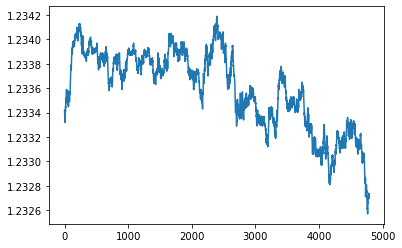

In [3]:
df["bid"].plot()

<AxesSubplot:>

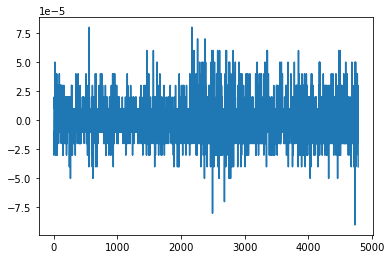

In [4]:
df["bid"].diff().plot()

<AxesSubplot:>

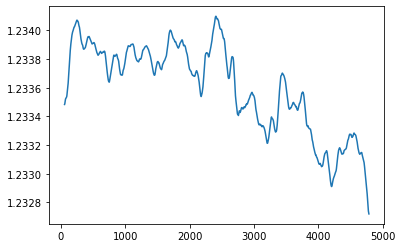

In [5]:
df["bid"].rolling(60).mean().plot()

In [6]:
def selection(sql):
    conn = open_connection()
    cursor = conn.cursor()
    cursor.execute(sql)
    result = cursor.fetchall()
    conn.commit()
    return result

sql = '''select min(timestamp) from d_usdcad_ask'''
r = selection(sql)
min_datetime = r[0]
sql = '''select max(timestamp) from d_usdcad_ask'''
r = selection(sql)
max_datetime = r[0]

print(min_datetime,max_datetime)

(datetime.datetime(2017, 10, 1, 22, 5, 0, 32000),) (datetime.datetime(2022, 4, 15, 9, 59, 58, 284000),)


In [7]:
sql = '''SELECT * FROM d_usdcad_ask 
         WHERE timestamp > '2022-04-014' 
         ORDER BY timestamp ASC
         LIMIT 1000000'''
myprices = selection(sql)
print(myprices)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



,datehour,close,vol
timestamp,,,
2022-04-15 09:59:54.217,2022-04-15_08,1.25981,500000.0
2022-04-15 09:59:55.073,2022-04-15_08,1.25983,500000.0
2022-04-15 09:59:55.424,2022-04-15_08,1.25984,500000.0
2022-04-15 09:59:57.280,2022-04-15_08,1.25979,500000.0
2022-04-15 09:59:58.284,2022-04-15_08,1.25982,500000.0


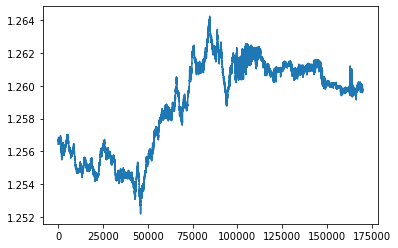

In [14]:
import pandas as pd
df = pd.DataFrame([p for p in myprices])
df.columns = ["timestamp","datehour","close","vol"]
#print(df)
df["close"].plot()
df = df.set_index("timestamp")
df.tail()

In [15]:
df2 = df[["close"]].resample('1H').ohlc()


#'10min')['Price'].ohlc()
df2.tail()

close                           
                        open     high      low    close
timestamp                                              
2022-04-15 05:00:00  1.26142  1.26153  1.26058  1.26067
2022-04-15 06:00:00  1.26062  1.26135  1.26035  1.26119
2022-04-15 07:00:00  1.26135  1.26158  1.25986  1.26036
2022-04-15 08:00:00  1.26035  1.26047  1.25940  1.25993
2022-04-15 09:00:00  1.25997  1.26122  1.25914  1.25982

<AxesSubplot:xlabel='timestamp'>

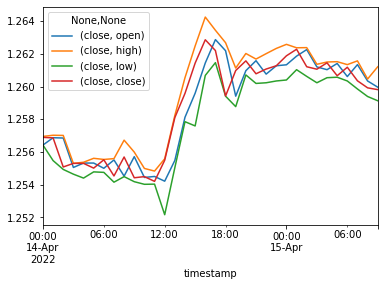

In [16]:
df2.plot()

array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>],
      dtype=object)

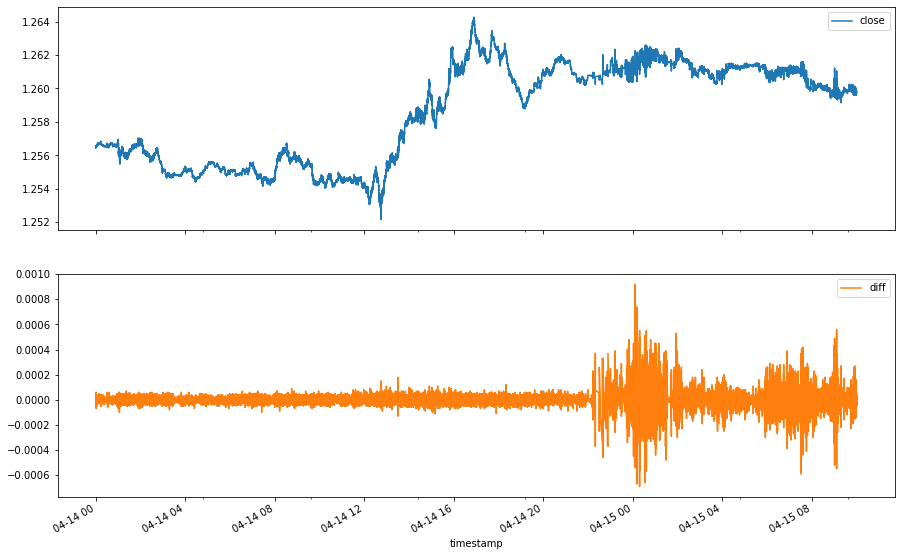

In [17]:
df["diff"] = df["close"].diff()

df[["close","diff"]].plot(subplots=True,figsize=(15,10))

In [18]:
%pip install -U git+https://github.com/twopirllc/pandas-ta

  Cloning https://github.com/twopirllc/pandas-ta to c:\users\ruben\appdata\local\temp\pip-req-build-c19uvxbm
Note: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/twopirllc/pandas-ta 'C:\Users\ruben\AppData\Local\Temp\pip-req-build-c19uvxbm'


In [19]:
import pandas_ta as ta
# Calculate Returns and append to the df DataFrame
df.ta.log_return(cumulative=True, append=True)
df.ta.percent_return(cumulative=True, append=True)

# Take a peek
df.tail()

,datehour,close,vol,diff,CUMLOGRET_1,CUMPCTRET_1
timestamp,,,,,,
2022-04-15 09:59:54.217,2022-04-15_08,1.25981,500000.0,-0.00002,0.002687,0.002690
2022-04-15 09:59:55.073,2022-04-15_08,1.25983,500000.0,0.00002,0.002702,0.002706
2022-04-15 09:59:55.424,2022-04-15_08,1.25984,500000.0,0.00001,0.002710,0.002714
2022-04-15 09:59:57.280,2022-04-15_08,1.25979,500000.0,-0.00005,0.002671,0.002674
2022-04-15 09:59:58.284,2022-04-15_08,1.25982,500000.0,0.00003,0.002694,0.002698


In [20]:
df.head()

,datehour,close,vol,diff,CUMLOGRET_1,CUMPCTRET_1
timestamp,,,,,,
2022-04-14 00:00:00.067,2022-04-13_23,1.25643,500000.0,NaN,0.000000,0.000000
2022-04-14 00:00:00.071,2022-04-13_23,1.25645,1000000.0,0.00002,0.000016,0.000016
2022-04-14 00:00:00.221,2022-04-13_23,1.25646,1000000.0,0.00001,0.000024,0.000024
2022-04-14 00:00:00.663,2022-04-13_23,1.25644,1000000.0,-0.00002,0.000008,0.000008
2022-04-14 00:00:04.470,2022-04-13_23,1.25643,1000000.0,-0.00001,0.000000,0.000000


In [21]:
df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [22]:
df.ta.sma(length=100,append=True)
df.ta.sma(length=250,append=True)
df.ta.sma(length=500,append=True)

timestamp
2022-04-14 00:00:00.067         NaN
2022-04-14 00:00:00.071         NaN
2022-04-14 00:00:00.221         NaN
2022-04-14 00:00:00.663         NaN
2022-04-14 00:00:04.470         NaN
                             ...   
2022-04-15 09:59:54.217    1.259812
2022-04-15 09:59:55.073    1.259812
2022-04-15 09:59:55.424    1.259812
2022-04-15 09:59:57.280    1.259811
2022-04-15 09:59:58.284    1.259811
Name: SMA_500, Length: 169825, dtype: float64

In [23]:
help(ta.sma)

Help on function sma in module pandas_ta.overlap.sma:

sma(close, length=None, talib=None, offset=None, **kwargs)
    Simple Moving Average (SMA)
    
    The Simple Moving Average is the classic moving average that is the equally
    weighted average over n periods.
    
    Sources:
        https://www.tradingtechnologies.com/help/x-study/technical-indicator-definitions/simple-moving-average-sma/
    
    Calculation:
        Default Inputs:
            length=10
        SMA = SUM(close, length) / length
    
    Args:
        close (pd.Series): Series of 'close's
        length (int): It's period. Default: 10
        talib (bool): If TA Lib is installed and talib is True, Returns the TA Lib
            version. Default: True
        offset (int): How many periods to offset the result. Default: 0
    
    Kwargs:
        adjust (bool): Default: True
        presma (bool, optional): If True, uses SMA for initial value.
        fillna (value, optional): pd.DataFrame.fillna(value)
     

<AxesSubplot:xlabel='timestamp'>

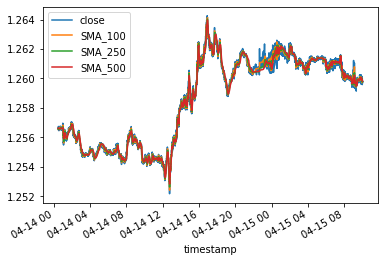

In [24]:
df[["close","SMA_100","SMA_250","SMA_500"]][500:].plot()

In [25]:
help(ta.bbands)

Help on function bbands in module pandas_ta.volatility.bbands:

bbands(close, length=None, std=None, ddof=0, mamode=None, talib=None, offset=None, **kwargs)
    Bollinger Bands (BBANDS)
    
    A popular volatility indicator by John Bollinger.
    
    Sources:
        https://www.tradingview.com/wiki/Bollinger_Bands_(BB)
    
    Calculation:
        Default Inputs:
            length=5, std=2, mamode="sma", ddof=0
        EMA = Exponential Moving Average
        SMA = Simple Moving Average
        STDEV = Standard Deviation
        stdev = STDEV(close, length, ddof)
        if "ema":
            MID = EMA(close, length)
        else:
            MID = SMA(close, length)
    
        LOWER = MID - std * stdev
        UPPER = MID + std * stdev
    
        BANDWIDTH = 100 * (UPPER - LOWER) / MID
        PERCENT = (close - LOWER) / (UPPER - LOWER)
    
    Args:
        close (pd.Series): Series of 'close's
        length (int): The short period. Default: 5
        std (int): The long 

In [26]:
df.ta.categories

['candles',
 'cycles',
 'momentum',
 'overlap',
 'performance',
 'statistics',
 'trend',
 'volatility',
 'volume']

In [27]:
df=df.dropna()
df

,datehour,close,vol,diff,CUMLOGRET_1,CUMPCTRET_1,SMA_100,SMA_250,SMA_500
timestamp,,,,,,,,,
2022-04-14 00:29:01.236,2022-04-13_23,1.25656,500000.0,-0.00001,0.000103,0.000103,1.256542,1.256606,1.256631
2022-04-14 00:29:01.686,2022-04-13_23,1.25657,500000.0,0.00001,0.000111,0.000111,1.256543,1.256605,1.256632
2022-04-14 00:29:02.191,2022-04-13_23,1.25656,500000.0,-0.00001,0.000103,0.000103,1.256543,1.256604,1.256632
2022-04-14 00:29:02.265,2022-04-13_23,1.25657,500000.0,0.00001,0.000111,0.000111,1.256543,1.256603,1.256632
2022-04-14 00:29:02.311,2022-04-13_23,1.25656,500000.0,-0.00001,0.000103,0.000103,1.256543,1.256603,1.256632
...,...,...,...,...,...,...,...,...,...
2022-04-15 09:59:54.217,2022-04-15_08,1.25981,500000.0,-0.00002,0.002687,0.002690,1.259781,1.259793,1.259812
2022-04-15 09:59:55.073,2022-04-15_08,1.25983,500000.0,0.00002,0.002702,0.002706,1.259782,1.259794,1.259812
2022-04-15 09:59:55.424,2022-04-15_08,1.25984,500000.0,0.00001,0.002710,0.002714,1.259782,1.259794,1.259812


array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>], dtype=object)

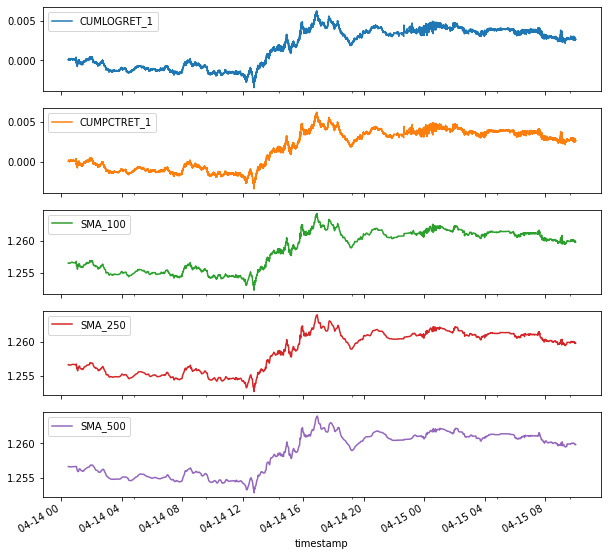

In [28]:
df[["CUMLOGRET_1","CUMPCTRET_1","SMA_100","SMA_250","SMA_500"]].plot(subplots=True,figsize=(10,10))

In [29]:
%pip install gym

Note: you may need to restart the kernel to use updated packages.


In [30]:
#https://github.com/AminHP/gym-anytrading
%pip install gym_anytrading 

Note: you may need to restart the kernel to use updated packages.


info: {'total_reward': 65.70000000001073, 'total_profit': 0.9912789750756822, 'position': 0}


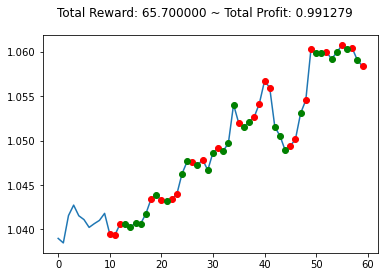

In [31]:
import gym
import gym_anytrading
from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions 
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK, STOCKS_GOOGL
import matplotlib.pyplot as plt

env = gym.make('forex-v0', frame_bound=(50, 100), window_size=10)
# env = gym.make('stocks-v0', frame_bound=(50, 100), window_size=10)

observation = env.reset()
while True:
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    #env.render()
    if done:
        print("info:", info)
        break

plt.cla()
env.render_all()
plt.show()

In [32]:
class Environment:
    def __init__(self,df):
        self.df = df
        self.current_index = 1
    def step(self,action):
        done = False
        obs = df.iloc[self.current_index]
        self.current_index+=1
        if self.current_index > 10000: #len(df):
            done = True
            
        reward = 0
        if not done:
            p_prev = df.iloc[self.current_index-1]["close"]
            p_curr = df.iloc[self.current_index]["close"]
            #print(p_prev,p_curr)
        
            diff_price = 10000 * (p_curr - p_prev)
            cond1_win = action == "buy" and diff_price > 0
            cond2_win = action == "sell" and diff_price < 0
            if cond1_win or cond2_win:
                reward = abs(diff_price)
            else:
                if action == "flat":
                    reward = 0
                else:
                    reward = -abs(diff_price)
            
        
        return obs, reward, done
        

class Agent:
    def __init__(self,name):
        self.name = name
        self.param1 = 0  # pain/pleasure
        self.param2 = 1  # incentive to take action 
        
        self.eps   = 0.5
        self.gamma = 0.1
        
        self.prev_price = 0
        self.current_price = 0
        
        self.prev_action = "flat"
        self.current_action = "flat"
        
    def reward(self,reward):
        if reward > 0:
            self.param1 += self.eps
        else:
            self.param1 -= self.eps
            
            
        if  self.prev_action == self.current_action:
            self.param2 += self.gamma
        else:
            self.param2 -= self.gamma

            
            
    def obs(self,obs):
      
        self.prev_price = self.current_price
        self.current_price = obs["close"]
    
    def action(self):
        action = "flat"
            
        # action will be a function of pain/pleasure and max. reward obtained
        diff = self.param2 * (self.current_price - self.prev_price)
        val  = self.param1 * self.param2 
        
       
        if val > 0.1:                
            action = "buy"
        if val < -0.1:
            action = "sell"
  
        self.prev_action = self.current_action
        self.current_action = action
        print("val",val, "p1", self.param1, "p2", self.param2, self.current_price, self.prev_price,action)
        return action


C:\Users\ruben\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
env = Environment(df)
agent = Agent("test1")

total_steps=0
total_reward = 0
action = "flat"
while True:    
    
    obs, reward, done = env.step(action)
    total_steps  += 1
    total_reward += reward
    #print(total_steps,"current rewards",reward,"action",action)
    if done:
        break
        
    agent.reward(reward)
    agent.obs(obs)
    action = agent.action()
    
    
print(f"Episode done total reward {total_reward}")
    

val -0.55 p1 -0.5 p2 1.1 1.25657 0 sell
val -1.0 p1 -1.0 p2 1.0 1.25656 1.25657 sell
val -0.55 p1 -0.5 p2 1.1 1.25657 1.25656 sell
val -1.2000000000000002 p1 -1.0 p2 1.2000000000000002 1.25656 1.25657 sell
val -1.9500000000000004 p1 -1.5 p2 1.3000000000000003 1.25657 1.25656 sell
val -1.4000000000000004 p1 -1.0 p2 1.4000000000000004 1.25658 1.25657 sell
val -2.250000000000001 p1 -1.5 p2 1.5000000000000004 1.25657 1.25658 sell
val -1.6000000000000005 p1 -1.0 p2 1.6000000000000005 1.25658 1.25657 sell
val -2.5500000000000007 p1 -1.5 p2 1.7000000000000006 1.25657 1.25658 sell
val -1.8000000000000007 p1 -1.0 p2 1.8000000000000007 1.25658 1.25657 sell
val -2.8500000000000014 p1 -1.5 p2 1.9000000000000008 1.25657 1.25658 sell
val -2.000000000000001 p1 -1.0 p2 2.000000000000001 1.25658 1.25657 sell
val -3.1500000000000012 p1 -1.5 p2 2.100000000000001 1.25657 1.25658 sell
val -2.200000000000001 p1 -1.0 p2 2.200000000000001 1.25658 1.25657 sell
val -1.1500000000000006 p1 -0.5 p2 2.3000000000000

val -37.249999999999915 p1 -2.5 p2 14.899999999999965 1.25651 1.2565 sell
val -44.99999999999989 p1 -3.0 p2 14.999999999999964 1.25652 1.25651 sell
val -52.84999999999987 p1 -3.5 p2 15.099999999999964 1.25653 1.25652 sell
val -60.799999999999855 p1 -4.0 p2 15.199999999999964 1.25654 1.25653 sell
val -53.54999999999987 p1 -3.5 p2 15.299999999999963 1.25655 1.25654 sell
val -61.59999999999985 p1 -4.0 p2 15.399999999999963 1.25654 1.25655 sell
val -54.24999999999987 p1 -3.5 p2 15.499999999999963 1.25655 1.25654 sell
val -46.79999999999988 p1 -3.0 p2 15.599999999999962 1.25654 1.25655 sell
val -54.94999999999987 p1 -3.5 p2 15.699999999999962 1.25653 1.25654 sell
val -47.399999999999885 p1 -3.0 p2 15.799999999999962 1.25654 1.25653 sell
val -55.649999999999864 p1 -3.5 p2 15.899999999999961 1.25653 1.25654 sell
val -47.999999999999886 p1 -3.0 p2 15.999999999999961 1.25654 1.25653 sell
val -56.349999999999866 p1 -3.5 p2 16.099999999999962 1.25653 1.25654 sell
val -48.599999999999895 p1 -3.0 p

val -186.45000000000115 p1 -5.5 p2 33.90000000000021 1.25667 1.25668 sell
val -204.00000000000128 p1 -6.0 p2 34.00000000000021 1.25668 1.25667 sell
val -221.6500000000014 p1 -6.5 p2 34.100000000000215 1.25669 1.25668 sell
val -239.4000000000015 p1 -7.0 p2 34.200000000000216 1.25671 1.25669 sell
val -257.25000000000165 p1 -7.5 p2 34.30000000000022 1.25672 1.25671 sell
val -240.80000000000155 p1 -7.0 p2 34.40000000000022 1.25673 1.25672 sell
val -258.75000000000165 p1 -7.5 p2 34.50000000000022 1.25672 1.25673 sell
val -242.20000000000155 p1 -7.0 p2 34.60000000000022 1.25673 1.25672 sell
val -260.25000000000165 p1 -7.5 p2 34.70000000000022 1.25672 1.25673 sell
val -243.60000000000156 p1 -7.0 p2 34.800000000000225 1.25673 1.25672 sell
val -261.7500000000017 p1 -7.5 p2 34.900000000000226 1.25672 1.25673 sell
val -245.0000000000016 p1 -7.0 p2 35.00000000000023 1.25673 1.25672 sell
val -263.2500000000017 p1 -7.5 p2 35.10000000000023 1.25672 1.25673 sell
val -246.40000000000163 p1 -7.0 p2 35.2

val -105.60000000000096 p1 -2.0 p2 52.80000000000048 1.25664 1.25665 sell
val -132.2500000000012 p1 -2.5 p2 52.90000000000048 1.25662 1.25664 sell
val -106.00000000000097 p1 -2.0 p2 53.00000000000048 1.25663 1.25662 sell
val -132.75000000000122 p1 -2.5 p2 53.100000000000485 1.25662 1.25663 sell
val -106.40000000000097 p1 -2.0 p2 53.200000000000486 1.25664 1.25662 sell
val -79.95000000000073 p1 -1.5 p2 53.30000000000049 1.25663 1.25664 sell
val -53.40000000000049 p1 -1.0 p2 53.40000000000049 1.25662 1.25663 sell
val -26.750000000000245 p1 -0.5 p2 53.50000000000049 1.2566 1.25662 sell
val -53.60000000000049 p1 -1.0 p2 53.60000000000049 1.25659 1.2566 sell
val -26.850000000000247 p1 -0.5 p2 53.70000000000049 1.2566 1.25659 sell
val 0.0 p1 0.0 p2 53.800000000000495 1.25657 1.2566 flat
val -26.850000000000247 p1 -0.5 p2 53.70000000000049 1.25655 1.25657 sell
val 0.0 p1 0.0 p2 53.60000000000049 1.25657 1.25655 flat
val -26.750000000000245 p1 -0.5 p2 53.50000000000049 1.25654 1.25657 sell
val

val -498.75000000000375 p1 -7.5 p2 66.5000000000005 1.25669 1.25668 sell
val -532.8000000000039 p1 -8.0 p2 66.60000000000049 1.25672 1.25669 sell
val -500.25000000000364 p1 -7.5 p2 66.70000000000049 1.25673 1.25672 sell
val -534.4000000000038 p1 -8.0 p2 66.80000000000048 1.25669 1.25673 sell
val -568.6500000000041 p1 -8.5 p2 66.90000000000047 1.25672 1.25669 sell
val -603.0000000000042 p1 -9.0 p2 67.00000000000047 1.25673 1.25672 sell
val -637.4500000000044 p1 -9.5 p2 67.10000000000046 1.25675 1.25673 sell
val -604.8000000000042 p1 -9.0 p2 67.20000000000046 1.25676 1.25675 sell
val -639.3500000000043 p1 -9.5 p2 67.30000000000045 1.25675 1.25676 sell
val -606.600000000004 p1 -9.0 p2 67.40000000000045 1.25676 1.25675 sell
val -573.7500000000038 p1 -8.5 p2 67.50000000000044 1.25674 1.25676 sell
val -608.400000000004 p1 -9.0 p2 67.60000000000043 1.25673 1.25674 sell
val -575.4500000000037 p1 -8.5 p2 67.70000000000043 1.25675 1.25673 sell
val -542.4000000000034 p1 -8.0 p2 67.80000000000042 

val -85.99999999999939 p1 -1.0 p2 85.99999999999939 1.25642 1.25641 sell
val -129.14999999999907 p1 -1.5 p2 86.09999999999938 1.25641 1.25642 sell
val -86.19999999999938 p1 -1.0 p2 86.19999999999938 1.25642 1.25641 sell
val -43.149999999999686 p1 -0.5 p2 86.29999999999937 1.25635 1.25642 sell
val 0.0 p1 0.0 p2 86.39999999999937 1.25633 1.25635 flat
val -43.149999999999686 p1 -0.5 p2 86.29999999999937 1.25632 1.25633 sell
val -86.19999999999938 p1 -1.0 p2 86.19999999999938 1.25631 1.25632 sell
val -43.149999999999686 p1 -0.5 p2 86.29999999999937 1.25633 1.25631 sell
val 0.0 p1 0.0 p2 86.39999999999937 1.25628 1.25633 flat
val -43.149999999999686 p1 -0.5 p2 86.29999999999937 1.25626 1.25628 sell
val -86.19999999999938 p1 -1.0 p2 86.19999999999938 1.25624 1.25626 sell
val -129.44999999999905 p1 -1.5 p2 86.29999999999937 1.25626 1.25624 sell
val -86.39999999999937 p1 -1.0 p2 86.39999999999937 1.25627 1.25626 sell
val -129.74999999999903 p1 -1.5 p2 86.49999999999936 1.25623 1.25627 sell
val

val -97.59999999999873 p1 -1.0 p2 97.59999999999873 1.25606 1.25605 sell
val -146.54999999999808 p1 -1.5 p2 97.69999999999872 1.25604 1.25606 sell
val -195.59999999999744 p1 -2.0 p2 97.79999999999872 1.25605 1.25604 sell
val -146.84999999999806 p1 -1.5 p2 97.89999999999871 1.25608 1.25605 sell
val -195.9999999999974 p1 -2.0 p2 97.9999999999987 1.25605 1.25608 sell
val -147.14999999999804 p1 -1.5 p2 98.0999999999987 1.25608 1.25605 sell
val -196.3999999999974 p1 -2.0 p2 98.1999999999987 1.25605 1.25608 sell
val -147.44999999999803 p1 -1.5 p2 98.29999999999869 1.25606 1.25605 sell
val -98.39999999999868 p1 -1.0 p2 98.39999999999868 1.25605 1.25606 sell
val -49.24999999999934 p1 -0.5 p2 98.49999999999868 1.25604 1.25605 sell
val 0.0 p1 0.0 p2 98.59999999999867 1.256 1.25604 flat
val -49.24999999999934 p1 -0.5 p2 98.49999999999868 1.25599 1.256 sell
val -98.39999999999868 p1 -1.0 p2 98.39999999999868 1.25597 1.25599 sell
val -147.749999999998 p1 -1.5 p2 98.49999999999868 1.25598 1.25597 se

val -342.5999999999934 p1 -3.0 p2 114.19999999999779 1.25636 1.25631 sell
val -400.0499999999922 p1 -3.5 p2 114.29999999999778 1.25633 1.25636 sell
val -343.19999999999334 p1 -3.0 p2 114.39999999999777 1.25636 1.25633 sell
val -286.24999999999443 p1 -2.5 p2 114.49999999999777 1.25635 1.25636 sell
val -343.7999999999933 p1 -3.0 p2 114.59999999999776 1.25631 1.25635 sell
val -286.7499999999944 p1 -2.5 p2 114.69999999999776 1.25635 1.25631 sell
val -344.39999999999327 p1 -3.0 p2 114.79999999999775 1.25631 1.25635 sell
val -402.14999999999213 p1 -3.5 p2 114.89999999999775 1.25634 1.25631 sell
val -344.99999999999324 p1 -3.0 p2 114.99999999999774 1.25635 1.25634 sell
val -287.7499999999943 p1 -2.5 p2 115.09999999999773 1.25634 1.25635 sell
val -345.5999999999932 p1 -3.0 p2 115.19999999999773 1.25631 1.25634 sell
val -288.2499999999943 p1 -2.5 p2 115.29999999999772 1.25637 1.25631 sell
val -230.79999999999544 p1 -2.0 p2 115.39999999999772 1.25636 1.25637 sell
val -288.74999999999426 p1 -2.5 

val 0.0 p1 0.0 p2 120.39999999999743 1.25558 1.25556 flat
val -60.14999999999872 p1 -0.5 p2 120.29999999999744 1.25557 1.25558 sell
val 0.0 p1 0.0 p2 120.19999999999744 1.25556 1.25557 flat
val -60.049999999998725 p1 -0.5 p2 120.09999999999745 1.25555 1.25556 sell
val 0.0 p1 0.0 p2 119.99999999999746 1.25554 1.25555 flat
val -59.94999999999873 p1 -0.5 p2 119.89999999999746 1.25551 1.25554 sell
val 0.0 p1 0.0 p2 119.79999999999747 1.25552 1.25551 flat
val -59.84999999999874 p1 -0.5 p2 119.69999999999747 1.2555 1.25552 sell
val -119.59999999999748 p1 -1.0 p2 119.59999999999748 1.25548 1.2555 sell
val -179.5499999999962 p1 -1.5 p2 119.69999999999747 1.25549 1.25548 sell
val -119.79999999999747 p1 -1.0 p2 119.79999999999747 1.2555 1.25549 sell
val -179.8499999999962 p1 -1.5 p2 119.89999999999746 1.25548 1.2555 sell
val -239.9999999999949 p1 -2.0 p2 119.99999999999746 1.25549 1.25548 sell
val -300.24999999999363 p1 -2.5 p2 120.09999999999745 1.2555 1.25549 sell
val -360.59999999999235 p1 -3

val -2352.7999999999392 p1 -17.0 p2 138.39999999999642 1.25609 1.2561 sell
val -2423.7499999999372 p1 -17.5 p2 138.49999999999642 1.2561 1.25609 sell
val -2494.7999999999356 p1 -18.0 p2 138.5999999999964 1.25612 1.2561 sell
val -2427.2499999999372 p1 -17.5 p2 138.6999999999964 1.25613 1.25612 sell
val -2498.399999999935 p1 -18.0 p2 138.7999999999964 1.25612 1.25613 sell
val -2430.749999999937 p1 -17.5 p2 138.8999999999964 1.25613 1.25612 sell
val -2501.999999999935 p1 -18.0 p2 138.9999999999964 1.25612 1.25613 sell
val -2573.349999999933 p1 -18.5 p2 139.09999999999638 1.25613 1.25612 sell
val -2644.799999999931 p1 -19.0 p2 139.19999999999638 1.25616 1.25613 sell
val -2716.3499999999294 p1 -19.5 p2 139.29999999999637 1.25618 1.25616 sell
val -2787.9999999999272 p1 -20.0 p2 139.39999999999637 1.25619 1.25618 sell
val -2720.249999999929 p1 -19.5 p2 139.49999999999636 1.2562 1.25619 sell
val -2791.9999999999272 p1 -20.0 p2 139.59999999999636 1.25619 1.2562 sell
val -2863.8499999999253 p1 -

val -2749.249999999919 p1 -17.5 p2 157.09999999999536 1.2562 1.25621 sell
val -2672.399999999921 p1 -17.0 p2 157.19999999999536 1.25621 1.2562 sell
val -2752.7499999999186 p1 -17.5 p2 157.29999999999535 1.2562 1.25621 sell
val -2675.799999999921 p1 -17.0 p2 157.39999999999534 1.25623 1.2562 sell
val -2598.749999999923 p1 -16.5 p2 157.49999999999534 1.25622 1.25623 sell
val -2679.1999999999207 p1 -17.0 p2 157.59999999999533 1.2562 1.25622 sell
val -2759.749999999918 p1 -17.5 p2 157.69999999999533 1.25622 1.2562 sell
val -2682.5999999999203 p1 -17.0 p2 157.79999999999532 1.25623 1.25622 sell
val -2763.249999999918 p1 -17.5 p2 157.89999999999532 1.25621 1.25623 sell
val -2843.9999999999154 p1 -18.0 p2 157.9999999999953 1.25625 1.25621 sell
val -2766.7499999999177 p1 -17.5 p2 158.0999999999953 1.25626 1.25625 sell
val -2847.5999999999153 p1 -18.0 p2 158.1999999999953 1.25623 1.25626 sell
val -2928.549999999913 p1 -18.5 p2 158.2999999999953 1.25627 1.25623 sell
val -3009.5999999999103 p1 -1

val -4730.399999999847 p1 -27.0 p2 175.19999999999433 1.25645 1.25646 sell
val -4820.749999999844 p1 -27.5 p2 175.29999999999433 1.25643 1.25645 sell
val -4735.7999999998465 p1 -27.0 p2 175.39999999999432 1.25644 1.25643 sell
val -4650.749999999849 p1 -26.5 p2 175.49999999999432 1.25643 1.25644 sell
val -4565.599999999852 p1 -26.0 p2 175.5999999999943 1.25642 1.25643 sell
val -4480.349999999855 p1 -25.5 p2 175.6999999999943 1.25641 1.25642 sell
val -4570.799999999852 p1 -26.0 p2 175.7999999999943 1.2564 1.25641 sell
val -4661.3499999998485 p1 -26.5 p2 175.8999999999943 1.25641 1.2564 sell
val -4751.999999999845 p1 -27.0 p2 175.9999999999943 1.25643 1.25641 sell
val -4666.649999999849 p1 -26.5 p2 176.09999999999428 1.25645 1.25643 sell
val -4757.399999999845 p1 -27.0 p2 176.19999999999428 1.25643 1.25645 sell
val -4848.249999999843 p1 -27.5 p2 176.29999999999427 1.25644 1.25643 sell
val -4939.19999999984 p1 -28.0 p2 176.39999999999426 1.25645 1.25644 sell
val -4853.749999999842 p1 -27.5

val -2826.0499999999015 p1 -14.5 p2 194.8999999999932 1.25619 1.25618 sell
val -2729.999999999905 p1 -14.0 p2 194.9999999999932 1.25618 1.25619 sell
val -2828.9499999999016 p1 -14.5 p2 195.0999999999932 1.25617 1.25618 sell
val -2732.7999999999047 p1 -14.0 p2 195.1999999999932 1.25618 1.25617 sell
val -2636.549999999908 p1 -13.5 p2 195.2999999999932 1.25617 1.25618 sell
val -2540.1999999999116 p1 -13.0 p2 195.39999999999318 1.25616 1.25617 sell
val -2443.7499999999145 p1 -12.5 p2 195.49999999999318 1.25613 1.25616 sell
val -2347.199999999918 p1 -12.0 p2 195.59999999999317 1.25612 1.25613 sell
val -2250.5499999999215 p1 -11.5 p2 195.69999999999317 1.25611 1.25612 sell
val -2153.7999999999247 p1 -11.0 p2 195.79999999999316 1.2561 1.25611 sell
val -2056.949999999928 p1 -10.5 p2 195.89999999999316 1.25608 1.2561 sell
val -2155.9999999999245 p1 -11.0 p2 195.99999999999315 1.25607 1.25608 sell
val -2255.149999999921 p1 -11.5 p2 196.09999999999314 1.25609 1.25607 sell
val -2354.399999999918 p

val -1178.6499999999567 p1 -5.5 p2 214.2999999999921 1.25597 1.25598 sell
val -1286.3999999999526 p1 -6.0 p2 214.3999999999921 1.25598 1.25597 sell
val -1394.2499999999486 p1 -6.5 p2 214.4999999999921 1.256 1.25598 sell
val -1502.1999999999446 p1 -7.0 p2 214.5999999999921 1.25603 1.256 sell
val -1395.5499999999486 p1 -6.5 p2 214.6999999999921 1.25605 1.25603 sell
val -1288.7999999999524 p1 -6.0 p2 214.79999999999208 1.25603 1.25605 sell
val -1396.8499999999485 p1 -6.5 p2 214.89999999999208 1.25602 1.25603 sell
val -1289.9999999999525 p1 -6.0 p2 214.99999999999207 1.25605 1.25602 sell
val -1398.1499999999485 p1 -6.5 p2 215.09999999999206 1.25602 1.25605 sell
val -1291.1999999999523 p1 -6.0 p2 215.19999999999206 1.25605 1.25602 sell
val -1399.4499999999484 p1 -6.5 p2 215.29999999999205 1.25603 1.25605 sell
val -1292.3999999999523 p1 -6.0 p2 215.39999999999205 1.25605 1.25603 sell
val -1400.7499999999482 p1 -6.5 p2 215.49999999999204 1.25601 1.25605 sell
val -1293.5999999999522 p1 -6.0 p2

val -1148.9999999999561 p1 -5.0 p2 229.79999999999123 1.25605 1.25604 sell
val -1264.4499999999516 p1 -5.5 p2 229.89999999999122 1.25604 1.25605 sell
val -1149.9999999999561 p1 -5.0 p2 229.99999999999122 1.25608 1.25604 sell
val -1265.5499999999518 p1 -5.5 p2 230.0999999999912 1.25605 1.25608 sell
val -1150.9999999999561 p1 -5.0 p2 230.1999999999912 1.25606 1.25605 sell
val -1266.6499999999517 p1 -5.5 p2 230.2999999999912 1.25603 1.25606 sell
val -1151.999999999956 p1 -5.0 p2 230.3999999999912 1.25604 1.25603 sell
val -1267.7499999999516 p1 -5.5 p2 230.4999999999912 1.25603 1.25604 sell
val -1152.999999999956 p1 -5.0 p2 230.59999999999118 1.25604 1.25603 sell
val -1268.8499999999515 p1 -5.5 p2 230.69999999999118 1.25603 1.25604 sell
val -1153.999999999956 p1 -5.0 p2 230.79999999999117 1.25604 1.25603 sell
val -1269.9499999999514 p1 -5.5 p2 230.89999999999117 1.25603 1.25604 sell
val -1385.999999999947 p1 -6.0 p2 230.99999999999116 1.25604 1.25603 sell
val -1271.0499999999513 p1 -5.5 p2

val -619.7499999999754 p1 -2.5 p2 247.8999999999902 1.25599 1.25594 sell
val -495.9999999999804 p1 -2.0 p2 247.9999999999902 1.25598 1.25599 sell
val -620.2499999999754 p1 -2.5 p2 248.0999999999902 1.25595 1.25598 sell
val -496.39999999998037 p1 -2.0 p2 248.19999999999018 1.25598 1.25595 sell
val -620.7499999999754 p1 -2.5 p2 248.29999999999018 1.25596 1.25598 sell
val -745.1999999999705 p1 -3.0 p2 248.39999999999017 1.25597 1.25596 sell
val -621.2499999999754 p1 -2.5 p2 248.49999999999017 1.25598 1.25597 sell
val -745.7999999999705 p1 -3.0 p2 248.59999999999016 1.25597 1.25598 sell
val -621.7499999999754 p1 -2.5 p2 248.69999999999015 1.25598 1.25597 sell
val -497.5999999999803 p1 -2.0 p2 248.79999999999015 1.25595 1.25598 sell
val -622.2499999999753 p1 -2.5 p2 248.89999999999014 1.25594 1.25595 sell
val -497.9999999999803 p1 -2.0 p2 248.99999999999014 1.25595 1.25594 sell
val -622.7499999999753 p1 -2.5 p2 249.09999999999013 1.25594 1.25595 sell
val -498.39999999998025 p1 -2.0 p2 249.1

val -1846.5999999999403 p1 -7.0 p2 263.7999999999915 1.25608 1.25605 sell
val -1979.2499999999363 p1 -7.5 p2 263.8999999999915 1.25604 1.25608 sell
val -2111.9999999999322 p1 -8.0 p2 263.99999999999153 1.25605 1.25604 sell
val -1980.7499999999366 p1 -7.5 p2 264.09999999999155 1.25606 1.25605 sell
val -2113.5999999999326 p1 -8.0 p2 264.1999999999916 1.25605 1.25606 sell
val -2246.549999999929 p1 -8.5 p2 264.2999999999916 1.25606 1.25605 sell
val -2379.5999999999244 p1 -9.0 p2 264.3999999999916 1.25607 1.25606 sell
val -2248.249999999929 p1 -8.5 p2 264.49999999999164 1.25611 1.25607 sell
val -2381.399999999925 p1 -9.0 p2 264.59999999999167 1.25609 1.25611 sell
val -2514.649999999921 p1 -9.5 p2 264.6999999999917 1.2561 1.25609 sell
val -2383.1999999999252 p1 -9.0 p2 264.7999999999917 1.25613 1.2561 sell
val -2516.5499999999215 p1 -9.5 p2 264.89999999999173 1.2561 1.25613 sell
val -2384.999999999926 p1 -9.0 p2 264.99999999999176 1.25613 1.2561 sell
val -2253.3499999999303 p1 -8.5 p2 265.09

val -2693.249999999962 p1 -9.5 p2 283.49999999999596 1.25627 1.25623 sell
val -2835.99999999996 p1 -10.0 p2 283.599999999996 1.25629 1.25627 sell
val -2978.849999999958 p1 -10.5 p2 283.699999999996 1.2563 1.25629 sell
val -2837.9999999999604 p1 -10.0 p2 283.79999999999603 1.25631 1.2563 sell
val -2980.9499999999584 p1 -10.5 p2 283.89999999999606 1.25628 1.25631 sell
val -2839.999999999961 p1 -10.0 p2 283.9999999999961 1.25631 1.25628 sell
val -2698.949999999963 p1 -9.5 p2 284.0999999999961 1.2563 1.25631 sell
val -2557.799999999965 p1 -9.0 p2 284.1999999999961 1.25629 1.2563 sell
val -2700.8499999999635 p1 -9.5 p2 284.29999999999615 1.25625 1.25629 sell
val -2843.999999999962 p1 -10.0 p2 284.39999999999617 1.25629 1.25625 sell
val -2702.7499999999636 p1 -9.5 p2 284.4999999999962 1.2563 1.25629 sell
val -2845.9999999999623 p1 -10.0 p2 284.5999999999962 1.25629 1.2563 sell
val -2704.649999999964 p1 -9.5 p2 284.69999999999624 1.2563 1.25629 sell
val -2847.9999999999627 p1 -10.0 p2 284.799

val -3933.800000000004 p1 -13.0 p2 302.6000000000003 1.25636 1.25635 sell
val -3783.750000000004 p1 -12.5 p2 302.70000000000033 1.25637 1.25636 sell
val -3633.600000000004 p1 -12.0 p2 302.80000000000035 1.25636 1.25637 sell
val -3483.3500000000045 p1 -11.5 p2 302.9000000000004 1.25635 1.25636 sell
val -3333.0000000000045 p1 -11.0 p2 303.0000000000004 1.25634 1.25635 sell
val -3182.5500000000043 p1 -10.5 p2 303.1000000000004 1.25633 1.25634 sell
val -3335.200000000005 p1 -11.0 p2 303.20000000000044 1.25632 1.25633 sell
val -3487.9500000000053 p1 -11.5 p2 303.30000000000047 1.25636 1.25632 sell
val -3337.4000000000055 p1 -11.0 p2 303.4000000000005 1.25637 1.25636 sell
val -3186.7500000000055 p1 -10.5 p2 303.5000000000005 1.25636 1.25637 sell
val -3036.0000000000055 p1 -10.0 p2 303.60000000000053 1.25633 1.25636 sell
val -3188.850000000006 p1 -10.5 p2 303.70000000000056 1.25632 1.25633 sell
val -3038.000000000006 p1 -10.0 p2 303.8000000000006 1.25633 1.25632 sell
val -3190.950000000006 p1

val -2901.600000000043 p1 -9.0 p2 322.4000000000048 1.25631 1.25632 sell
val -3063.750000000046 p1 -9.5 p2 322.50000000000483 1.2563 1.25631 sell
val -3226.0000000000487 p1 -10.0 p2 322.60000000000485 1.25631 1.2563 sell
val -3065.6500000000465 p1 -9.5 p2 322.7000000000049 1.25632 1.25631 sell
val -2905.200000000044 p1 -9.0 p2 322.8000000000049 1.25631 1.25632 sell
val -3067.5500000000466 p1 -9.5 p2 322.9000000000049 1.2563 1.25631 sell
val -3230.0000000000496 p1 -10.0 p2 323.00000000000495 1.25631 1.2563 sell
val -3392.550000000052 p1 -10.5 p2 323.10000000000497 1.25632 1.25631 sell
val -3232.00000000005 p1 -10.0 p2 323.200000000005 1.25633 1.25632 sell
val -3394.650000000053 p1 -10.5 p2 323.300000000005 1.25632 1.25633 sell
val -3557.4000000000556 p1 -11.0 p2 323.40000000000504 1.25633 1.25632 sell
val -3720.250000000058 p1 -11.5 p2 323.50000000000506 1.25635 1.25633 sell
val -3883.2000000000608 p1 -12.0 p2 323.6000000000051 1.25636 1.25635 sell
val -3722.550000000059 p1 -11.5 p2 323

val -7515.200000000202 p1 -22.0 p2 341.6000000000092 1.2566 1.25663 sell
val -7346.5500000001975 p1 -21.5 p2 341.7000000000092 1.25663 1.2566 sell
val -7177.800000000194 p1 -21.0 p2 341.8000000000092 1.25662 1.25663 sell
val -7350.850000000199 p1 -21.5 p2 341.90000000000924 1.25659 1.25662 sell
val -7182.000000000195 p1 -21.0 p2 342.00000000000927 1.25662 1.25659 sell
val -7355.1500000002 p1 -21.5 p2 342.1000000000093 1.25659 1.25662 sell
val -7186.200000000195 p1 -21.0 p2 342.2000000000093 1.25662 1.25659 sell
val -7359.450000000201 p1 -21.5 p2 342.30000000000933 1.25659 1.25662 sell
val -7190.400000000196 p1 -21.0 p2 342.40000000000936 1.25662 1.25659 sell
val -7363.750000000202 p1 -21.5 p2 342.5000000000094 1.25658 1.25662 sell
val -7194.600000000198 p1 -21.0 p2 342.6000000000094 1.25662 1.25658 sell
val -7025.350000000193 p1 -20.5 p2 342.7000000000094 1.25661 1.25662 sell
val -7198.800000000198 p1 -21.0 p2 342.80000000000945 1.25658 1.25661 sell
val -7029.450000000194 p1 -20.5 p2 3

val -7576.800000000284 p1 -21.0 p2 360.80000000001354 1.2566 1.25659 sell
val -7759.350000000291 p1 -21.5 p2 360.90000000001356 1.25661 1.2566 sell
val -7942.000000000299 p1 -22.0 p2 361.0000000000136 1.25662 1.25661 sell
val -8124.7500000003065 p1 -22.5 p2 361.1000000000136 1.25663 1.25662 sell
val -7946.4000000003 p1 -22.0 p2 361.20000000001363 1.25664 1.25663 sell
val -8129.250000000307 p1 -22.5 p2 361.30000000001365 1.25663 1.25664 sell
val -8312.200000000315 p1 -23.0 p2 361.4000000000137 1.25664 1.25663 sell
val -8495.250000000322 p1 -23.5 p2 361.5000000000137 1.25666 1.25664 sell
val -8678.400000000329 p1 -24.0 p2 361.6000000000137 1.25668 1.25666 sell
val -8499.950000000323 p1 -23.5 p2 361.70000000001374 1.25669 1.25668 sell
val -8683.20000000033 p1 -24.0 p2 361.80000000001377 1.25668 1.25669 sell
val -8504.650000000323 p1 -23.5 p2 361.9000000000138 1.25669 1.25668 sell
val -8688.000000000331 p1 -24.0 p2 362.0000000000138 1.25668 1.25669 sell
val -8509.350000000326 p1 -23.5 p2 3

val -7024.45000000033 p1 -18.5 p2 379.70000000001784 1.25657 1.25656 sell
val -6836.400000000322 p1 -18.0 p2 379.80000000001786 1.25656 1.25657 sell
val -7028.150000000331 p1 -18.5 p2 379.9000000000179 1.25655 1.25656 sell
val -6840.000000000322 p1 -18.0 p2 380.0000000000179 1.25656 1.25655 sell
val -7031.850000000331 p1 -18.5 p2 380.1000000000179 1.25655 1.25656 sell
val -6843.600000000323 p1 -18.0 p2 380.20000000001795 1.25656 1.25655 sell
val -7035.550000000332 p1 -18.5 p2 380.300000000018 1.25654 1.25656 sell
val -6847.200000000324 p1 -18.0 p2 380.400000000018 1.25656 1.25654 sell
val -6658.750000000316 p1 -17.5 p2 380.500000000018 1.25653 1.25656 sell
val -6470.200000000306 p1 -17.0 p2 380.60000000001804 1.25652 1.25653 sell
val -6281.5500000002985 p1 -16.5 p2 380.70000000001806 1.25651 1.25652 sell
val -6092.800000000289 p1 -16.0 p2 380.8000000000181 1.2565 1.25651 sell
val -5903.950000000281 p1 -15.5 p2 380.9000000000181 1.25648 1.2565 sell
val -6096.00000000029 p1 -16.0 p2 381.

val -8567.750000000475 p1 -21.5 p2 398.5000000000221 1.25671 1.25668 sell
val -8769.200000000486 p1 -22.0 p2 398.60000000002213 1.25668 1.25671 sell
val -8572.050000000476 p1 -21.5 p2 398.70000000002216 1.25671 1.25668 sell
val -8773.600000000488 p1 -22.0 p2 398.8000000000222 1.25668 1.25671 sell
val -8576.350000000477 p1 -21.5 p2 398.9000000000222 1.25671 1.25668 sell
val -8778.00000000049 p1 -22.0 p2 399.0000000000222 1.25668 1.25671 sell
val -8580.650000000478 p1 -21.5 p2 399.10000000002225 1.25672 1.25668 sell
val -8782.40000000049 p1 -22.0 p2 399.20000000002227 1.2567 1.25672 sell
val -8984.250000000502 p1 -22.5 p2 399.3000000000223 1.25672 1.2567 sell
val -9186.200000000514 p1 -23.0 p2 399.4000000000223 1.25674 1.25672 sell
val -8988.750000000502 p1 -22.5 p2 399.50000000002234 1.25678 1.25674 sell
val -9190.800000000514 p1 -23.0 p2 399.60000000002236 1.25676 1.25678 sell
val -8993.250000000504 p1 -22.5 p2 399.7000000000224 1.25679 1.25676 sell
val -9195.400000000516 p1 -23.0 p2 3

val -9801.850000000619 p1 -23.5 p2 417.10000000002634 1.25688 1.25691 sell
val -9595.600000000606 p1 -23.0 p2 417.20000000002636 1.25689 1.25688 sell
val -9389.250000000593 p1 -22.5 p2 417.3000000000264 1.25688 1.25689 sell
val -9600.200000000608 p1 -23.0 p2 417.4000000000264 1.25687 1.25688 sell
val -9811.25000000062 p1 -23.5 p2 417.50000000002643 1.25689 1.25687 sell
val -9604.800000000609 p1 -23.0 p2 417.60000000002645 1.2569 1.25689 sell
val -9815.950000000623 p1 -23.5 p2 417.7000000000265 1.25689 1.2569 sell
val -9609.400000000609 p1 -23.0 p2 417.8000000000265 1.25691 1.25689 sell
val -9820.650000000624 p1 -23.5 p2 417.9000000000265 1.25689 1.25691 sell
val -10032.000000000637 p1 -24.0 p2 418.00000000002655 1.2569 1.25689 sell
val -10243.45000000065 p1 -24.5 p2 418.10000000002657 1.25691 1.2569 sell
val -10036.800000000638 p1 -24.0 p2 418.2000000000266 1.25692 1.25691 sell
val -9830.050000000625 p1 -23.5 p2 418.3000000000266 1.2569 1.25692 sell
val -10041.600000000639 p1 -24.0 p2 

val -8728.000000000615 p1 -20.0 p2 436.40000000003073 1.25678 1.25677 sell
val -8948.250000000631 p1 -20.5 p2 436.50000000003075 1.25677 1.25678 sell
val -9168.600000000646 p1 -21.0 p2 436.6000000000308 1.25678 1.25677 sell
val -8952.350000000632 p1 -20.5 p2 436.7000000000308 1.25679 1.25678 sell
val -9172.800000000647 p1 -21.0 p2 436.8000000000308 1.25678 1.25679 sell
val -8956.450000000632 p1 -20.5 p2 436.90000000003084 1.25679 1.25678 sell
val -9177.000000000648 p1 -21.0 p2 437.00000000003087 1.25678 1.25679 sell
val -9397.650000000664 p1 -21.5 p2 437.1000000000309 1.25679 1.25678 sell
val -9618.40000000068 p1 -22.0 p2 437.2000000000309 1.25681 1.25679 sell
val -9401.950000000665 p1 -21.5 p2 437.30000000003093 1.25686 1.25681 sell
val -9622.800000000681 p1 -22.0 p2 437.40000000003096 1.25685 1.25686 sell
val -9843.750000000697 p1 -22.5 p2 437.500000000031 1.25687 1.25685 sell
val -10064.800000000712 p1 -23.0 p2 437.600000000031 1.25688 1.25687 sell
val -9848.250000000698 p1 -22.5 p2

val -7978.250000000616 p1 -17.5 p2 455.90000000003516 1.25672 1.25673 sell
val -8208.000000000633 p1 -18.0 p2 456.0000000000352 1.25671 1.25672 sell
val -8437.850000000652 p1 -18.5 p2 456.1000000000352 1.25673 1.25671 sell
val -8211.600000000633 p1 -18.0 p2 456.20000000003523 1.25674 1.25673 sell
val -7985.250000000617 p1 -17.5 p2 456.30000000003525 1.25673 1.25674 sell
val -7758.8000000005995 p1 -17.0 p2 456.4000000000353 1.25672 1.25673 sell
val -7988.750000000618 p1 -17.5 p2 456.5000000000353 1.25671 1.25672 sell
val -7762.2000000006 p1 -17.0 p2 456.6000000000353 1.25672 1.25671 sell
val -7535.550000000583 p1 -16.5 p2 456.70000000003535 1.25671 1.25672 sell
val -7765.6000000006015 p1 -17.0 p2 456.80000000003537 1.2567 1.25671 sell
val -7538.850000000584 p1 -16.5 p2 456.9000000000354 1.25672 1.2567 sell
val -7312.000000000567 p1 -16.0 p2 457.0000000000354 1.25666 1.25672 sell
val -7542.150000000584 p1 -16.5 p2 457.10000000003544 1.25665 1.25666 sell
val -7315.200000000567 p1 -16.0 p2

val -10218.95000000085 p1 -21.5 p2 475.3000000000396 1.25685 1.25684 sell
val -10458.80000000087 p1 -22.0 p2 475.4000000000396 1.25684 1.25685 sell
val -10698.750000000891 p1 -22.5 p2 475.5000000000396 1.25685 1.25684 sell
val -10463.200000000872 p1 -22.0 p2 475.60000000003964 1.25686 1.25685 sell
val -10703.250000000893 p1 -22.5 p2 475.70000000003967 1.25685 1.25686 sell
val -10467.600000000873 p1 -22.0 p2 475.8000000000397 1.25686 1.25685 sell
val -10707.750000000893 p1 -22.5 p2 475.9000000000397 1.25685 1.25686 sell
val -10948.000000000913 p1 -23.0 p2 476.00000000003973 1.25686 1.25685 sell
val -11188.350000000934 p1 -23.5 p2 476.10000000003976 1.25689 1.25686 sell
val -11428.800000000954 p1 -24.0 p2 476.2000000000398 1.25691 1.25689 sell
val -11193.050000000936 p1 -23.5 p2 476.3000000000398 1.25692 1.25691 sell
val -10957.200000000916 p1 -23.0 p2 476.4000000000398 1.25691 1.25692 sell
val -11197.750000000937 p1 -23.5 p2 476.50000000003985 1.2569 1.25691 sell
val -10961.800000000918

val -2723.0500000002426 p1 -5.5 p2 495.1000000000441 1.25632 1.25633 sell
val -2476.0000000002206 p1 -5.0 p2 495.2000000000441 1.25634 1.25632 sell
val -2228.8500000001986 p1 -4.5 p2 495.3000000000441 1.25633 1.25634 sell
val -2477.0000000002206 p1 -5.0 p2 495.40000000004414 1.25628 1.25633 sell
val -2229.7500000001987 p1 -4.5 p2 495.50000000004417 1.25631 1.25628 sell
val -1982.4000000001768 p1 -4.0 p2 495.6000000000442 1.25626 1.25631 sell
val -1734.9500000001547 p1 -3.5 p2 495.7000000000442 1.25625 1.25626 sell
val -1487.4000000001326 p1 -3.0 p2 495.80000000004424 1.25624 1.25625 sell
val -1239.7500000001107 p1 -2.5 p2 495.90000000004426 1.25623 1.25624 sell
val -992.0000000000886 p1 -2.0 p2 496.0000000000443 1.2562 1.25623 sell
val -744.1500000000665 p1 -1.5 p2 496.1000000000443 1.25619 1.2562 sell
val -992.4000000000887 p1 -2.0 p2 496.2000000000443 1.25617 1.25619 sell
val -744.4500000000666 p1 -1.5 p2 496.30000000004435 1.25622 1.25617 sell
val -496.4000000000444 p1 -1.0 p2 496.4

val -1265.2500000001164 p1 -2.5 p2 506.1000000000466 1.25616 1.25615 sell
val -1518.6000000001397 p1 -3.0 p2 506.2000000000466 1.25619 1.25616 sell
val -1772.0500000001632 p1 -3.5 p2 506.3000000000466 1.2562 1.25619 sell
val -1519.2000000001399 p1 -3.0 p2 506.40000000004665 1.25621 1.2562 sell
val -1266.2500000001166 p1 -2.5 p2 506.50000000004667 1.2562 1.25621 sell
val -1519.80000000014 p1 -3.0 p2 506.6000000000467 1.25619 1.2562 sell
val -1773.4500000001635 p1 -3.5 p2 506.7000000000467 1.2562 1.25619 sell
val -2027.200000000187 p1 -4.0 p2 506.80000000004674 1.25621 1.2562 sell
val -2281.0500000002103 p1 -4.5 p2 506.90000000004676 1.25622 1.25621 sell
val -2535.0000000002337 p1 -5.0 p2 507.0000000000468 1.25623 1.25622 sell
val -2281.950000000211 p1 -4.5 p2 507.1000000000468 1.25625 1.25623 sell
val -2536.000000000234 p1 -5.0 p2 507.2000000000468 1.25622 1.25625 sell
val -2282.850000000211 p1 -4.5 p2 507.30000000004685 1.25625 1.25622 sell
val -2537.000000000234 p1 -5.0 p2 507.4000000

val -2094.400000000202 p1 -4.0 p2 523.6000000000505 1.25615 1.25613 sell
val -2356.6500000002275 p1 -4.5 p2 523.7000000000505 1.25613 1.25615 sell
val -2619.000000000253 p1 -5.0 p2 523.8000000000505 1.25614 1.25613 sell
val -2357.5500000002276 p1 -4.5 p2 523.9000000000506 1.25615 1.25614 sell
val -2620.000000000253 p1 -5.0 p2 524.0000000000506 1.25614 1.25615 sell
val -2358.4500000002276 p1 -4.5 p2 524.1000000000506 1.25615 1.25614 sell
val -2621.0000000002533 p1 -5.0 p2 524.2000000000506 1.25614 1.25615 sell
val -2359.3500000002277 p1 -4.5 p2 524.3000000000507 1.25615 1.25614 sell
val -2097.6000000002027 p1 -4.0 p2 524.4000000000507 1.25614 1.25615 sell
val -2360.2500000002283 p1 -4.5 p2 524.5000000000507 1.25612 1.25614 sell
val -2098.400000000203 p1 -4.0 p2 524.6000000000507 1.25615 1.25612 sell
val -1836.4500000001776 p1 -3.5 p2 524.7000000000507 1.25614 1.25615 sell
val -2099.200000000203 p1 -4.0 p2 524.8000000000508 1.25612 1.25614 sell
val -1837.150000000178 p1 -3.5 p2 524.90000

val -1877.0500000001869 p1 -3.5 p2 536.3000000000534 1.25613 1.25614 sell
val -2145.6000000002136 p1 -4.0 p2 536.4000000000534 1.2561 1.25613 sell
val -2414.2500000002406 p1 -4.5 p2 536.5000000000534 1.25612 1.2561 sell
val -2683.0000000002674 p1 -5.0 p2 536.6000000000535 1.25615 1.25612 sell
val -2415.1500000002407 p1 -4.5 p2 536.7000000000535 1.25616 1.25615 sell
val -2684.0000000002674 p1 -5.0 p2 536.8000000000535 1.25615 1.25616 sell
val -2416.0500000002407 p1 -4.5 p2 536.9000000000535 1.25616 1.25615 sell
val -2148.000000000214 p1 -4.0 p2 537.0000000000535 1.25615 1.25616 sell
val -2416.950000000241 p1 -4.5 p2 537.1000000000536 1.25612 1.25615 sell
val -2148.8000000002144 p1 -4.0 p2 537.2000000000536 1.25615 1.25612 sell
val -2417.8500000002414 p1 -4.5 p2 537.3000000000536 1.25613 1.25615 sell
val -2149.6000000002145 p1 -4.0 p2 537.4000000000536 1.25616 1.25613 sell
val -1881.2500000001878 p1 -3.5 p2 537.5000000000537 1.25615 1.25616 sell
val -1612.8000000001612 p1 -3.0 p2 537.600

val -555.8000000000578 p1 -1.0 p2 555.8000000000578 1.25603 1.25606 sell
val -277.9500000000289 p1 -0.5 p2 555.9000000000578 1.25604 1.25603 sell
val -556.0000000000579 p1 -1.0 p2 556.0000000000579 1.25603 1.25604 sell
val -278.05000000002894 p1 -0.5 p2 556.1000000000579 1.25606 1.25603 sell
val -556.2000000000579 p1 -1.0 p2 556.2000000000579 1.25604 1.25606 sell
val -834.4500000000869 p1 -1.5 p2 556.3000000000579 1.25606 1.25604 sell
val -1112.800000000116 p1 -2.0 p2 556.400000000058 1.25607 1.25606 sell
val -834.750000000087 p1 -1.5 p2 556.500000000058 1.25608 1.25607 sell
val -1113.200000000116 p1 -2.0 p2 556.600000000058 1.25607 1.25608 sell
val -835.050000000087 p1 -1.5 p2 556.700000000058 1.25608 1.25607 sell
val -1113.600000000116 p1 -2.0 p2 556.800000000058 1.25607 1.25608 sell
val -1392.250000000145 p1 -2.5 p2 556.9000000000581 1.25608 1.25607 sell
val -1114.0000000001162 p1 -2.0 p2 557.0000000000581 1.25611 1.25608 sell
val -1392.7500000001453 p1 -2.5 p2 557.1000000000581 1.2

val -1430.750000000154 p1 -2.5 p2 572.3000000000616 1.25592 1.25594 sell
val -1144.8000000001232 p1 -2.0 p2 572.4000000000616 1.25594 1.25592 sell
val -1431.2500000001542 p1 -2.5 p2 572.5000000000616 1.25592 1.25594 sell
val -1145.2000000001233 p1 -2.0 p2 572.6000000000616 1.25594 1.25592 sell
val -1431.7500000001542 p1 -2.5 p2 572.7000000000617 1.25591 1.25594 sell
val -1718.4000000001852 p1 -3.0 p2 572.8000000000617 1.25592 1.25591 sell
val -2005.150000000216 p1 -3.5 p2 572.9000000000617 1.25593 1.25592 sell
val -1719.000000000185 p1 -3.0 p2 573.0000000000617 1.25594 1.25593 sell
val -2005.8500000002161 p1 -3.5 p2 573.1000000000618 1.25593 1.25594 sell
val -1719.6000000001854 p1 -3.0 p2 573.2000000000618 1.25594 1.25593 sell
val -2006.5500000002162 p1 -3.5 p2 573.3000000000618 1.2559 1.25594 sell
val -1720.2000000001854 p1 -3.0 p2 573.4000000000618 1.25591 1.2559 sell
val -2007.2500000002165 p1 -3.5 p2 573.5000000000618 1.2559 1.25591 sell
val -2294.4000000002475 p1 -4.0 p2 573.60000

val -582.800000000064 p1 -1.0 p2 582.800000000064 1.25563 1.25564 sell
val -291.450000000032 p1 -0.5 p2 582.900000000064 1.25564 1.25563 sell
val 0.0 p1 0.0 p2 583.000000000064 1.25563 1.25564 flat
val -291.450000000032 p1 -0.5 p2 582.900000000064 1.2556 1.25563 sell
val -582.800000000064 p1 -1.0 p2 582.800000000064 1.25559 1.2556 sell
val -291.450000000032 p1 -0.5 p2 582.900000000064 1.2556 1.25559 sell
val -583.000000000064 p1 -1.0 p2 583.000000000064 1.25559 1.2556 sell
val -874.650000000096 p1 -1.5 p2 583.100000000064 1.2556 1.25559 sell
val -583.200000000064 p1 -1.0 p2 583.200000000064 1.25563 1.2556 sell
val -874.9500000000961 p1 -1.5 p2 583.3000000000641 1.25562 1.25563 sell
val -583.4000000000641 p1 -1.0 p2 583.4000000000641 1.25563 1.25562 sell
val -875.2500000000962 p1 -1.5 p2 583.5000000000641 1.25562 1.25563 sell
val -1167.2000000001283 p1 -2.0 p2 583.6000000000641 1.25563 1.25562 sell
val -1459.2500000001605 p1 -2.5 p2 583.7000000000642 1.25564 1.25563 sell
val -1167.60000

val -1795.2000000002026 p1 -3.0 p2 598.4000000000675 1.25582 1.25581 sell
val -1496.2500000001687 p1 -2.5 p2 598.5000000000675 1.25581 1.25582 sell
val -1795.8000000002025 p1 -3.0 p2 598.6000000000676 1.25579 1.25581 sell
val -1496.750000000169 p1 -2.5 p2 598.7000000000676 1.2558 1.25579 sell
val -1796.400000000203 p1 -3.0 p2 598.8000000000676 1.25579 1.2558 sell
val -1497.2500000001692 p1 -2.5 p2 598.9000000000676 1.25581 1.25579 sell
val -1797.0000000002028 p1 -3.0 p2 599.0000000000676 1.25579 1.25581 sell
val -1497.7500000001692 p1 -2.5 p2 599.1000000000677 1.25581 1.25579 sell
val -1797.6000000002032 p1 -3.0 p2 599.2000000000677 1.25579 1.25581 sell
val -1498.2500000001692 p1 -2.5 p2 599.3000000000677 1.25581 1.25579 sell
val -1798.200000000203 p1 -3.0 p2 599.4000000000677 1.25579 1.25581 sell
val -1498.7500000001694 p1 -2.5 p2 599.5000000000678 1.25581 1.25579 sell
val -1798.8000000002035 p1 -3.0 p2 599.6000000000678 1.25579 1.25581 sell
val -1499.2500000001696 p1 -2.5 p2 599.7000

val -4005.9500000004655 p1 -6.5 p2 616.3000000000716 1.25583 1.25584 sell
val -3698.40000000043 p1 -6.0 p2 616.4000000000716 1.25584 1.25583 sell
val -3390.750000000394 p1 -5.5 p2 616.5000000000716 1.25583 1.25584 sell
val -3699.6000000004296 p1 -6.0 p2 616.6000000000716 1.25582 1.25583 sell
val -3391.850000000394 p1 -5.5 p2 616.7000000000717 1.25588 1.25582 sell
val -3700.8000000004304 p1 -6.0 p2 616.8000000000717 1.25586 1.25588 sell
val -4009.850000000466 p1 -6.5 p2 616.9000000000717 1.25588 1.25586 sell
val -3702.00000000043 p1 -6.0 p2 617.0000000000717 1.25589 1.25588 sell
val -4011.150000000466 p1 -6.5 p2 617.1000000000718 1.25587 1.25589 sell
val -4320.400000000503 p1 -7.0 p2 617.2000000000718 1.25591 1.25587 sell
val -4012.450000000467 p1 -6.5 p2 617.3000000000718 1.25592 1.25591 sell
val -3704.4000000004307 p1 -6.0 p2 617.4000000000718 1.25591 1.25592 sell
val -4013.750000000467 p1 -6.5 p2 617.5000000000719 1.25589 1.25591 sell
val -3705.6000000004315 p1 -6.0 p2 617.6000000000

val -4137.250000000495 p1 -6.5 p2 636.5000000000762 1.2558 1.25584 sell
val -4456.200000000534 p1 -7.0 p2 636.6000000000762 1.25581 1.2558 sell
val -4138.550000000496 p1 -6.5 p2 636.7000000000762 1.25584 1.25581 sell
val -4457.600000000533 p1 -7.0 p2 636.8000000000762 1.25581 1.25584 sell
val -4139.850000000496 p1 -6.5 p2 636.9000000000763 1.25585 1.25581 sell
val -4459.000000000534 p1 -7.0 p2 637.0000000000763 1.25582 1.25585 sell
val -4141.150000000496 p1 -6.5 p2 637.1000000000763 1.25587 1.25582 sell
val -4460.400000000534 p1 -7.0 p2 637.2000000000763 1.25583 1.25587 sell
val -4142.450000000496 p1 -6.5 p2 637.3000000000764 1.25588 1.25583 sell
val -3824.400000000458 p1 -6.0 p2 637.4000000000764 1.25587 1.25588 sell
val -4143.750000000497 p1 -6.5 p2 637.5000000000764 1.25583 1.25587 sell
val -3825.6000000004587 p1 -6.0 p2 637.6000000000764 1.25588 1.25583 sell
val -4145.050000000497 p1 -6.5 p2 637.7000000000764 1.25587 1.25588 sell
val -3826.8000000004586 p1 -6.0 p2 637.8000000000765

val -4907.250000000602 p1 -7.5 p2 654.3000000000802 1.25588 1.25587 sell
val -5235.200000000642 p1 -8.0 p2 654.4000000000802 1.25585 1.25588 sell
val -4908.750000000602 p1 -7.5 p2 654.5000000000803 1.25588 1.25585 sell
val -4582.200000000562 p1 -7.0 p2 654.6000000000803 1.25585 1.25588 sell
val -4255.550000000522 p1 -6.5 p2 654.7000000000803 1.25584 1.25585 sell
val -4583.600000000562 p1 -7.0 p2 654.8000000000803 1.25583 1.25584 sell
val -4911.750000000603 p1 -7.5 p2 654.9000000000804 1.25584 1.25583 sell
val -4585.000000000563 p1 -7.0 p2 655.0000000000804 1.25586 1.25584 sell
val -4913.250000000603 p1 -7.5 p2 655.1000000000804 1.25585 1.25586 sell
val -4586.400000000563 p1 -7.0 p2 655.2000000000804 1.25586 1.25585 sell
val -4914.750000000603 p1 -7.5 p2 655.3000000000804 1.25585 1.25586 sell
val -4587.800000000563 p1 -7.0 p2 655.4000000000805 1.25586 1.25585 sell
val -4916.250000000604 p1 -7.5 p2 655.5000000000805 1.25585 1.25586 sell
val -4589.200000000564 p1 -7.0 p2 655.6000000000805

val -2019.0000000002533 p1 -3.0 p2 673.0000000000845 1.25581 1.25582 sell
val -2355.850000000296 p1 -3.5 p2 673.1000000000845 1.2558 1.25581 sell
val -2019.6000000002537 p1 -3.0 p2 673.2000000000845 1.25581 1.2558 sell
val -2356.5500000002958 p1 -3.5 p2 673.3000000000845 1.2558 1.25581 sell
val -2020.2000000002536 p1 -3.0 p2 673.4000000000846 1.25581 1.2558 sell
val -2357.250000000296 p1 -3.5 p2 673.5000000000846 1.2558 1.25581 sell
val -2020.800000000254 p1 -3.0 p2 673.6000000000846 1.25581 1.2558 sell
val -2357.9500000002963 p1 -3.5 p2 673.7000000000846 1.2558 1.25581 sell
val -2021.4000000002538 p1 -3.0 p2 673.8000000000847 1.25581 1.2558 sell
val -2358.650000000296 p1 -3.5 p2 673.9000000000847 1.2558 1.25581 sell
val -2022.0000000002542 p1 -3.0 p2 674.0000000000847 1.25581 1.2558 sell
val -1685.250000000212 p1 -2.5 p2 674.1000000000847 1.2558 1.25581 sell
val -2022.600000000254 p1 -3.0 p2 674.2000000000847 1.25579 1.2558 sell
val -1685.750000000212 p1 -2.5 p2 674.3000000000848 1.25

val -8653.750000001111 p1 -12.5 p2 692.3000000000889 1.25611 1.25612 sell
val -8308.800000001067 p1 -12.0 p2 692.4000000000889 1.25612 1.25611 sell
val -7963.750000001022 p1 -11.5 p2 692.5000000000889 1.25611 1.25612 sell
val -7618.600000000978 p1 -11.0 p2 692.6000000000889 1.25609 1.25611 sell
val -7966.050000001023 p1 -11.5 p2 692.700000000089 1.25606 1.25609 sell
val -7620.800000000979 p1 -11.0 p2 692.800000000089 1.25609 1.25606 sell
val -7968.350000001024 p1 -11.5 p2 692.900000000089 1.25605 1.25609 sell
val -7623.0000000009795 p1 -11.0 p2 693.000000000089 1.25607 1.25605 sell
val -7970.650000001024 p1 -11.5 p2 693.100000000089 1.25605 1.25607 sell
val -7625.200000000979 p1 -11.0 p2 693.2000000000891 1.25606 1.25605 sell
val -7972.950000001025 p1 -11.5 p2 693.3000000000891 1.25605 1.25606 sell
val -8320.800000001069 p1 -12.0 p2 693.4000000000891 1.25606 1.25605 sell
val -7975.250000001025 p1 -11.5 p2 693.5000000000891 1.25608 1.25606 sell
val -8323.20000000107 p1 -12.0 p2 693.6000

val -9954.000000001304 p1 -14.0 p2 711.0000000000931 1.25608 1.2561 sell
val -10310.95000000135 p1 -14.5 p2 711.1000000000931 1.25609 1.25608 sell
val -10668.000000001397 p1 -15.0 p2 711.2000000000932 1.2561 1.25609 sell
val -10313.850000001352 p1 -14.5 p2 711.3000000000932 1.25611 1.2561 sell
val -10671.000000001399 p1 -15.0 p2 711.4000000000932 1.2561 1.25611 sell
val -10316.750000001352 p1 -14.5 p2 711.5000000000932 1.25611 1.2561 sell
val -10674.000000001399 p1 -15.0 p2 711.6000000000932 1.2561 1.25611 sell
val -10319.650000001353 p1 -14.5 p2 711.7000000000933 1.25611 1.2561 sell
val -10677.000000001399 p1 -15.0 p2 711.8000000000933 1.2561 1.25611 sell
val -10322.550000001353 p1 -14.5 p2 711.9000000000933 1.25611 1.2561 sell
val -10680.0000000014 p1 -15.0 p2 712.0000000000933 1.2561 1.25611 sell
val -10325.450000001354 p1 -14.5 p2 712.1000000000934 1.25611 1.2561 sell
val -10683.0000000014 p1 -15.0 p2 712.2000000000934 1.2561 1.25611 sell
val -10328.350000001354 p1 -14.5 p2 712.300

val -13517.950000001805 p1 -18.5 p2 730.7000000000976 1.25627 1.25625 sell
val -13154.400000001757 p1 -18.0 p2 730.8000000000976 1.25628 1.25627 sell
val -12790.750000001708 p1 -17.5 p2 730.9000000000976 1.25627 1.25628 sell
val -12427.00000000166 p1 -17.0 p2 731.0000000000977 1.25626 1.25627 sell
val -12063.150000001611 p1 -16.5 p2 731.1000000000977 1.25625 1.25626 sell
val -11699.200000001563 p1 -16.0 p2 731.2000000000977 1.25624 1.25625 sell
val -12066.450000001612 p1 -16.5 p2 731.3000000000977 1.25623 1.25624 sell
val -12433.800000001662 p1 -17.0 p2 731.4000000000977 1.25624 1.25623 sell
val -12801.250000001712 p1 -17.5 p2 731.5000000000978 1.25625 1.25624 sell
val -13168.80000000176 p1 -18.0 p2 731.6000000000978 1.25627 1.25625 sell
val -13536.450000001809 p1 -18.5 p2 731.7000000000978 1.25628 1.25627 sell
val -13172.40000000176 p1 -18.0 p2 731.8000000000978 1.25629 1.25628 sell
val -13540.15000000181 p1 -18.5 p2 731.9000000000979 1.25628 1.25629 sell
val -13176.000000001763 p1 -1

val -13492.800000001835 p1 -18.0 p2 749.6000000001019 1.25644 1.25642 sell
val -13869.450000001885 p1 -18.5 p2 749.7000000001019 1.25645 1.25644 sell
val -14246.200000001936 p1 -19.0 p2 749.8000000001019 1.25646 1.25645 sell
val -13873.150000001886 p1 -18.5 p2 749.900000000102 1.25647 1.25646 sell
val -13500.000000001835 p1 -18.0 p2 750.000000000102 1.25646 1.25647 sell
val -13126.750000001784 p1 -17.5 p2 750.100000000102 1.25645 1.25646 sell
val -12753.400000001735 p1 -17.0 p2 750.200000000102 1.25644 1.25645 sell
val -13130.250000001786 p1 -17.5 p2 750.300000000102 1.25643 1.25644 sell
val -12756.800000001735 p1 -17.0 p2 750.4000000001021 1.25644 1.25643 sell
val -12383.250000001684 p1 -16.5 p2 750.5000000001021 1.25643 1.25644 sell
val -12009.600000001634 p1 -16.0 p2 750.6000000001021 1.25642 1.25643 sell
val -11635.850000001583 p1 -15.5 p2 750.7000000001021 1.2564 1.25642 sell
val -11262.000000001532 p1 -15.0 p2 750.8000000001022 1.25639 1.2564 sell
val -11638.950000001583 p1 -15.5

val -3460.950000000478 p1 -4.5 p2 769.1000000001063 1.25606 1.25607 sell
val -3076.8000000004254 p1 -4.0 p2 769.2000000001063 1.25607 1.25606 sell
val -3461.8500000004788 p1 -4.5 p2 769.3000000001064 1.25605 1.25607 sell
val -3077.6000000004256 p1 -4.0 p2 769.4000000001064 1.25606 1.25605 sell
val -2693.2500000003724 p1 -3.5 p2 769.5000000001064 1.25604 1.25606 sell
val -3078.4000000004257 p1 -4.0 p2 769.6000000001064 1.25602 1.25604 sell
val -3463.650000000479 p1 -4.5 p2 769.7000000001065 1.25603 1.25602 sell
val -3849.0000000005325 p1 -5.0 p2 769.8000000001065 1.25604 1.25603 sell
val -3464.5500000004795 p1 -4.5 p2 769.9000000001065 1.25605 1.25604 sell
val -3850.0000000005325 p1 -5.0 p2 770.0000000001065 1.25604 1.25605 sell
val -3465.4500000004796 p1 -4.5 p2 770.1000000001065 1.25605 1.25604 sell
val -3851.000000000533 p1 -5.0 p2 770.2000000001066 1.25604 1.25605 sell
val -3466.3500000004797 p1 -4.5 p2 770.3000000001066 1.25605 1.25604 sell
val -3852.000000000533 p1 -5.0 p2 770.400

val -783.8000000001097 p1 -1.0 p2 783.8000000001097 1.2559 1.25591 sell
val -391.95000000005484 p1 -0.5 p2 783.9000000001097 1.25591 1.2559 sell
val -784.0000000001097 p1 -1.0 p2 784.0000000001097 1.2559 1.25591 sell
val -392.05000000005487 p1 -0.5 p2 784.1000000001097 1.25591 1.2559 sell
val 0.0 p1 0.0 p2 784.2000000001098 1.2559 1.25591 flat
val -392.05000000005487 p1 -0.5 p2 784.1000000001097 1.25589 1.2559 sell
val 0.0 p1 0.0 p2 784.0000000001097 1.2559 1.25589 flat
val -391.95000000005484 p1 -0.5 p2 783.9000000001097 1.25589 1.2559 sell
val 0.0 p1 0.0 p2 783.8000000001097 1.2559 1.25589 flat
val -391.8500000000548 p1 -0.5 p2 783.7000000001096 1.25589 1.2559 sell
val 0.0 p1 0.0 p2 783.6000000001096 1.2559 1.25589 flat
val -391.7500000000548 p1 -0.5 p2 783.5000000001096 1.25589 1.2559 sell
val 0.0 p1 0.0 p2 783.4000000001096 1.2559 1.25589 flat
val -391.6500000000548 p1 -0.5 p2 783.3000000001095 1.25588 1.2559 sell
val -783.2000000001095 p1 -1.0 p2 783.2000000001095 1.25587 1.25588 

val -1961.2500000002747 p1 -2.5 p2 784.5000000001098 1.25562 1.2556 sell
val -1569.2000000002197 p1 -2.0 p2 784.6000000001098 1.25561 1.25562 sell
val -1961.7500000002747 p1 -2.5 p2 784.7000000001099 1.2556 1.25561 sell
val -1569.6000000002198 p1 -2.0 p2 784.8000000001099 1.25561 1.2556 sell
val -1962.2500000002747 p1 -2.5 p2 784.9000000001099 1.2556 1.25561 sell
val -2355.0000000003297 p1 -3.0 p2 785.0000000001099 1.25561 1.2556 sell
val -2747.850000000385 p1 -3.5 p2 785.10000000011 1.25562 1.25561 sell
val -3140.80000000044 p1 -4.0 p2 785.20000000011 1.25563 1.25562 sell
val -3533.850000000495 p1 -4.5 p2 785.30000000011 1.25564 1.25563 sell
val -3927.0000000005502 p1 -5.0 p2 785.40000000011 1.25565 1.25564 sell
val -3534.750000000495 p1 -4.5 p2 785.50000000011 1.25566 1.25565 sell
val -3928.0000000005502 p1 -5.0 p2 785.6000000001101 1.25565 1.25566 sell
val -3535.6500000004953 p1 -4.5 p2 785.7000000001101 1.25566 1.25565 sell
val -3929.0000000005507 p1 -5.0 p2 785.8000000001101 1.255

val -1202.5500000001707 p1 -1.5 p2 801.7000000001137 1.25548 1.25547 sell
val -801.8000000001138 p1 -1.0 p2 801.8000000001138 1.25549 1.25548 sell
val -400.9500000000569 p1 -0.5 p2 801.9000000001138 1.25548 1.25549 sell
val -802.0000000001138 p1 -1.0 p2 802.0000000001138 1.25547 1.25548 sell
val -401.0500000000569 p1 -0.5 p2 802.1000000001138 1.25548 1.25547 sell
val -802.2000000001138 p1 -1.0 p2 802.2000000001138 1.25547 1.25548 sell
val -1203.4500000001708 p1 -1.5 p2 802.3000000001139 1.25548 1.25547 sell
val -802.4000000001139 p1 -1.0 p2 802.4000000001139 1.25549 1.25548 sell
val -401.25000000005696 p1 -0.5 p2 802.5000000001139 1.25548 1.25549 sell
val -802.6000000001139 p1 -1.0 p2 802.6000000001139 1.25547 1.25548 sell
val -1204.050000000171 p1 -1.5 p2 802.700000000114 1.25548 1.25547 sell
val -802.800000000114 p1 -1.0 p2 802.800000000114 1.25549 1.25548 sell
val -1204.350000000171 p1 -1.5 p2 802.900000000114 1.25548 1.25549 sell
val -803.000000000114 p1 -1.0 p2 803.000000000114 1.

val -402.3500000000572 p1 -0.5 p2 804.7000000001144 1.25512 1.25513 sell
val 0.0 p1 0.0 p2 804.6000000001144 1.25513 1.25512 flat
val -402.2500000000572 p1 -0.5 p2 804.5000000001144 1.25511 1.25513 sell
val 0.0 p1 0.0 p2 804.4000000001143 1.25512 1.25511 flat
val -402.15000000005716 p1 -0.5 p2 804.3000000001143 1.25511 1.25512 sell
val 0.0 p1 0.0 p2 804.2000000001143 1.25512 1.25511 flat
val -402.05000000005714 p1 -0.5 p2 804.1000000001143 1.25511 1.25512 sell
val 0.0 p1 0.0 p2 804.0000000001143 1.2551 1.25511 flat
val -401.9500000000571 p1 -0.5 p2 803.9000000001142 1.25509 1.2551 sell
val 0.0 p1 0.0 p2 803.8000000001142 1.25508 1.25509 flat
val -401.8500000000571 p1 -0.5 p2 803.7000000001142 1.25507 1.25508 sell
val 0.0 p1 0.0 p2 803.6000000001142 1.25505 1.25507 flat
val -401.75000000005707 p1 -0.5 p2 803.5000000001141 1.25504 1.25505 sell
val -803.4000000001141 p1 -1.0 p2 803.4000000001141 1.25505 1.25504 sell
val -1205.2500000001712 p1 -1.5 p2 803.5000000001141 1.25507 1.25505 sell

val -5738.600000000825 p1 -7.0 p2 819.8000000001178 1.25511 1.25515 sell
val -5329.350000000766 p1 -6.5 p2 819.9000000001179 1.25514 1.25511 sell
val -5740.000000000825 p1 -7.0 p2 820.0000000001179 1.25513 1.25514 sell
val -6150.750000000884 p1 -7.5 p2 820.1000000001179 1.25514 1.25513 sell
val -5741.4000000008255 p1 -7.0 p2 820.2000000001179 1.25515 1.25514 sell
val -6152.250000000885 p1 -7.5 p2 820.300000000118 1.25513 1.25515 sell
val -5742.800000000826 p1 -7.0 p2 820.400000000118 1.25515 1.25513 sell
val -6153.750000000885 p1 -7.5 p2 820.500000000118 1.25512 1.25515 sell
val -5744.200000000827 p1 -7.0 p2 820.600000000118 1.25514 1.25512 sell
val -6155.250000000886 p1 -7.5 p2 820.700000000118 1.25511 1.25514 sell
val -6566.400000000945 p1 -8.0 p2 820.8000000001181 1.25514 1.25511 sell
val -6156.750000000886 p1 -7.5 p2 820.9000000001181 1.25515 1.25514 sell
val -5747.000000000827 p1 -7.0 p2 821.0000000001181 1.25514 1.25515 sell
val -6158.250000000886 p1 -7.5 p2 821.1000000001181 1.2

val -2096.250000000305 p1 -2.5 p2 838.5000000001221 1.25507 1.25508 sell
val -1677.2000000002442 p1 -2.0 p2 838.6000000001221 1.25508 1.25507 sell
val -2096.7500000003056 p1 -2.5 p2 838.7000000001221 1.25507 1.25508 sell
val -1677.6000000002443 p1 -2.0 p2 838.8000000001222 1.25508 1.25507 sell
val -2097.2500000003056 p1 -2.5 p2 838.9000000001222 1.25507 1.25508 sell
val -1678.0000000002444 p1 -2.0 p2 839.0000000001222 1.25508 1.25507 sell
val -2097.7500000003056 p1 -2.5 p2 839.1000000001222 1.25507 1.25508 sell
val -1678.4000000002445 p1 -2.0 p2 839.2000000001223 1.25508 1.25507 sell
val -1258.9500000001835 p1 -1.5 p2 839.3000000001223 1.25507 1.25508 sell
val -1678.8000000002446 p1 -2.0 p2 839.4000000001223 1.25506 1.25507 sell
val -1259.2500000001835 p1 -1.5 p2 839.5000000001223 1.25507 1.25506 sell
val -1679.2000000002447 p1 -2.0 p2 839.6000000001223 1.25506 1.25507 sell
val -2099.250000000306 p1 -2.5 p2 839.7000000001224 1.25507 1.25506 sell
val -1679.6000000002448 p1 -2.0 p2 839.8

val -1696.8000000002487 p1 -2.0 p2 848.4000000001244 1.25481 1.2548 sell
val -1272.7500000001864 p1 -1.5 p2 848.5000000001244 1.25483 1.25481 sell
val -1697.2000000002488 p1 -2.0 p2 848.6000000001244 1.25481 1.25483 sell
val -1273.0500000001866 p1 -1.5 p2 848.7000000001244 1.25482 1.25481 sell
val -848.8000000001244 p1 -1.0 p2 848.8000000001244 1.25481 1.25482 sell
val -424.45000000006223 p1 -0.5 p2 848.9000000001245 1.2548 1.25481 sell
val -849.0000000001245 p1 -1.0 p2 849.0000000001245 1.25478 1.2548 sell
val -424.55000000006225 p1 -0.5 p2 849.1000000001245 1.25479 1.25478 sell
val -849.2000000001245 p1 -1.0 p2 849.2000000001245 1.25478 1.25479 sell
val -424.6500000000623 p1 -0.5 p2 849.3000000001246 1.25479 1.25478 sell
val 0.0 p1 0.0 p2 849.4000000001246 1.25478 1.25479 flat
val -424.6500000000623 p1 -0.5 p2 849.3000000001246 1.25477 1.25478 sell
val 0.0 p1 0.0 p2 849.2000000001245 1.25478 1.25477 flat
val -424.55000000006225 p1 -0.5 p2 849.1000000001245 1.25477 1.25478 sell
val 0.

val -3017.350000000446 p1 -3.5 p2 862.1000000001275 1.25473 1.25474 sell
val -3448.80000000051 p1 -4.0 p2 862.2000000001275 1.25474 1.25473 sell
val -3880.350000000574 p1 -4.5 p2 862.3000000001275 1.25475 1.25474 sell
val -4312.000000000638 p1 -5.0 p2 862.4000000001275 1.25477 1.25475 sell
val -4743.750000000701 p1 -5.5 p2 862.5000000001276 1.25478 1.25477 sell
val -5175.600000000765 p1 -6.0 p2 862.6000000001276 1.25484 1.25478 sell
val -4744.850000000702 p1 -5.5 p2 862.7000000001276 1.25486 1.25484 sell
val -5176.800000000766 p1 -6.0 p2 862.8000000001276 1.25484 1.25486 sell
val -4745.950000000702 p1 -5.5 p2 862.9000000001276 1.25487 1.25484 sell
val -5178.000000000766 p1 -6.0 p2 863.0000000001277 1.25484 1.25487 sell
val -4747.050000000702 p1 -5.5 p2 863.1000000001277 1.25487 1.25484 sell
val -5179.2000000007665 p1 -6.0 p2 863.2000000001277 1.25484 1.25487 sell
val -5611.45000000083 p1 -6.5 p2 863.3000000001277 1.25487 1.25484 sell
val -5180.400000000766 p1 -6.0 p2 863.4000000001278 

<AxesSubplot:xlabel='timestamp'>

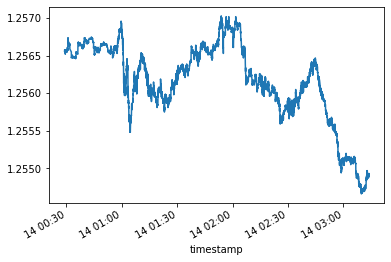

In [34]:
df["close"][0:10000].plot()